In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
df['Gender']=df['Gender'].astype('category')

In [6]:
df['Gender']=df['Gender'].cat.codes

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [8]:
scaler=MinMaxScaler()
sdata=scaler.fit_transform(df.iloc[:,1:])

In [26]:
(df.iloc[:,1:]).head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [9]:
pca_data=PCA(n_components=2).fit_transform(df.iloc[:,1:])
pca_df=pd.DataFrame(pca_data,columns=['pca1','pca2'])

In [10]:
sse=[]
k_value=range(1,14)
for i in k_value:
    km=KMeans(n_clusters=i)
    km.fit(pca_df)
    sse.append(km.inertia_)
print(sse)

[275534.6584569131, 181409.2320191298, 111540.6960547941, 74669.94018847417, 45092.05171373361, 38203.07504661728, 31221.02828829198, 26110.84946857202, 22794.888485477142, 20437.548520290562, 18545.56234706196, 16699.54111274883, 15004.364179777709]


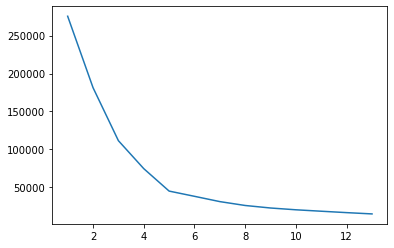

In [11]:
plt.plot(k_value,sse)

In [18]:
km=KMeans(n_clusters=5)
km.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
pred_target=km.predict(pca_df)
pred_target

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [20]:
pca_df['pred_target']=pred_target

In [24]:
pca_df.head(3)

,pca1,pca2,pred_target
0,-31.869945,-33.001252,3
1,0.764494,-56.842901,4
2,-57.408276,-13.124961,3


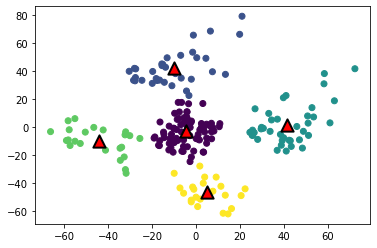

In [21]:
plt.scatter(x=pca_df.iloc[:,0],y=pca_df.iloc[:,1],c=pred_target)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',linewidths=2,edgecolors='k',s=150,c='r',label='Centroid')

In [16]:
from sklearn.metrics import silhouette_score

In [23]:
(silhouette_score(pca_df,pred_target)).round(4)

0.5539

In [32]:
sse=[]
k_value=range(1,10)
for i in k_value:
    km=KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)
print(sse)

[975512.0599999999, 387065.71377137717, 271396.5629660315, 195401.19855991466, 157157.7579059829, 122601.93746732261, 103233.01724386725, 86053.67444777445, 76962.62118702554]


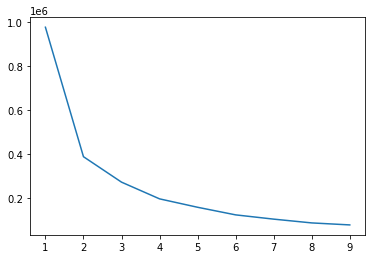

In [33]:
plt.plot(k_value,sse)

In [45]:
km=KMeans(n_clusters=2)
pred=km.fit_predict(df)

In [46]:
(silhouette_score(df,pred)).round(4)

0.4793